In [20]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
import numpy as np
import matplotlib.pyplot as plt
import hyperopt.pyll.stochastic
import GPyOpt
import time

In [12]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

def hyperopt_train_test(params):
    clf = KNeighborsClassifier(**params)
    return cross_val_score(clf, X, y).mean()

space4knn = {
    'n_neighbors': hp.choice('n_neighbors', range(1,50))
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=100, trials=trials)
print 'best:'
print hyperopt.space_eval(space4knn, best)

best:
{'n_neighbors': 5}


Text(0,0.5,u'cross validation accuracy')

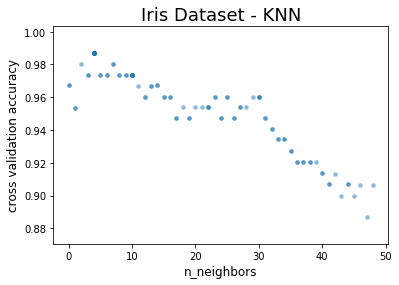

In [13]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1)#, figsize=(10,10))
xs = [t['misc']['vals']['n_neighbors'] for t in trials.trials]
ys = [-t['result']['loss'] for t in trials.trials]
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5)
ax.set_title('Iris Dataset - KNN', fontsize=18)
ax.set_xlabel('n_neighbors', fontsize=12)
ax.set_ylabel('cross validation accuracy', fontsize=12)

# Branin function

Populating the interactive namespace from numpy and matplotlib


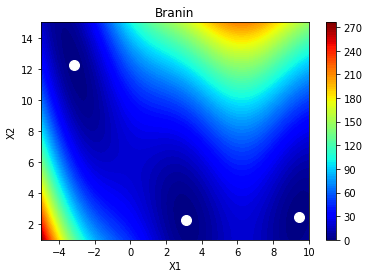

In [6]:
%pylab inline  
pyplot.set_cmap('jet')
# create the objective function
f_true = GPyOpt.objective_examples.experiments2d.branin()
bounds =[{'name': 'var_1', 'type': 'continuous', 'domain': f_true.bounds[0]},
         {'name': 'var_2', 'type': 'continuous', 'domain': f_true.bounds[1]}]
f_true.plot()

In [8]:
f_true.bounds

[(-5, 10), (1, 15)]

In [36]:
space = {
    'x': hp.uniform('x', -5, 10),
    'y': hp.uniform('y', 1, 15),
}

def f(arm):
    x = arm['x']
    y = arm['y']
    f = f_true.f([x,y]).flatten()[0]
    return {'loss': f, 'status': STATUS_OK, 'eval_time': time.time()}

trials = Trials()
start_time = time.time()
best = fmin(f, space, algo=tpe.suggest, max_evals=100, trials=trials)
print 'best:'
print hyperopt.space_eval(space, best)

best:
{'y': 1.933890143478964, 'x': 3.16431272577476}


In [37]:
arms = []
checkpoints = []
Y = []
for t in trials.trials:
    arms.append(t['misc']['vals'])
    checkpoints.append(t['result']['eval_time'] - start_time)

In [38]:
Y = trials.losses()

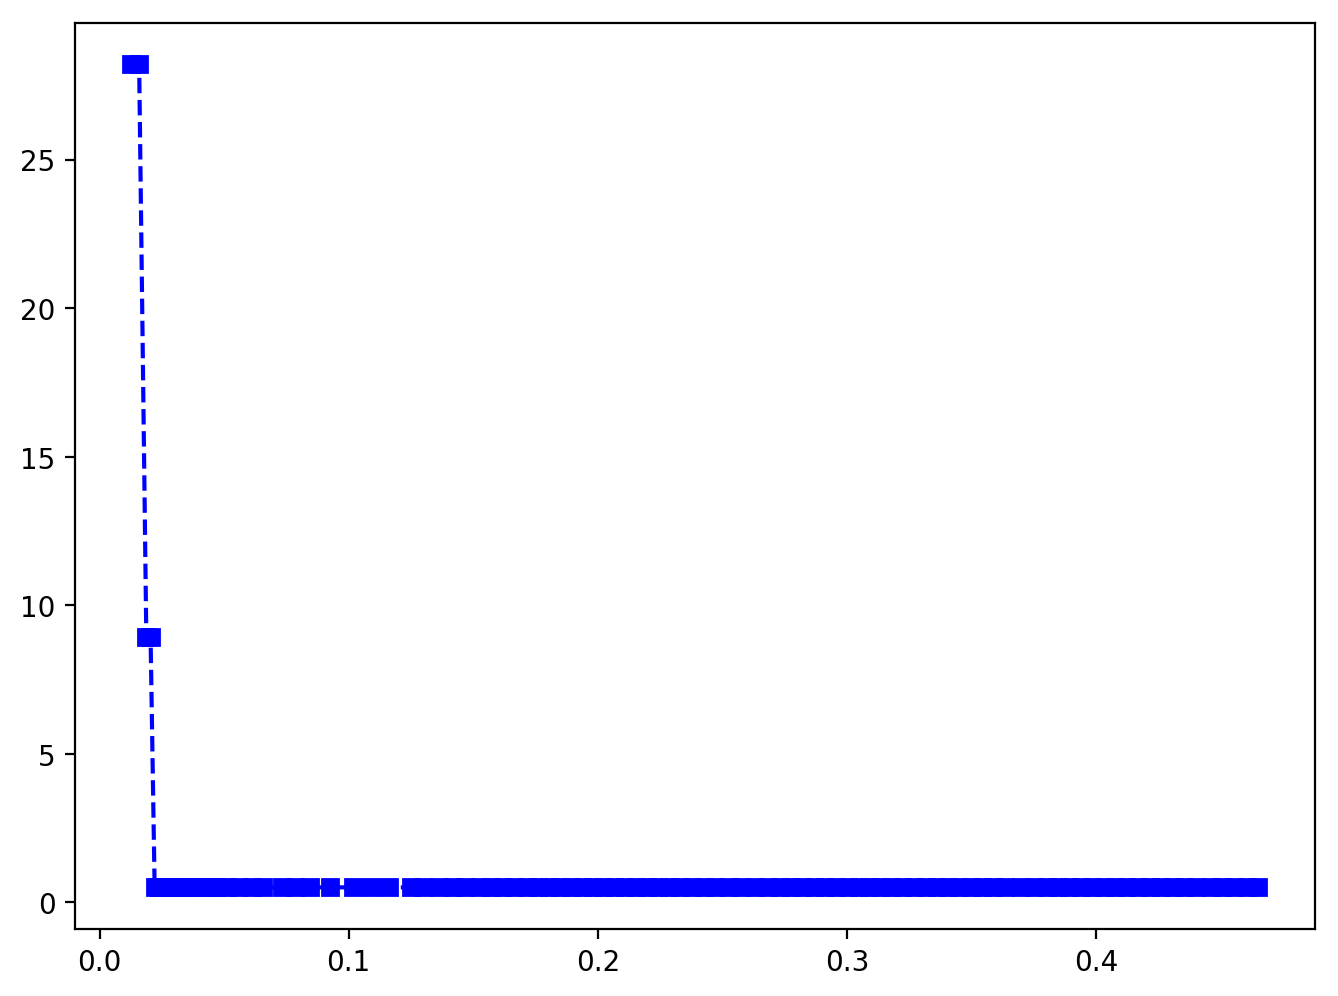

In [41]:
import os
dir = '/Users/signapoop/Desktop/autotune'
os.chdir(dir)
from autotune.util.best_value import best_value

Y_best = best_value(Y)

fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=200)
ax.plot(checkpoints, Y_best, '--bs')

# Defining search space

In [34]:
space = {
    'learning_rate': hp.loguniform('learning_rate', np.log(10**-6), np.log(10**0)),
    'n_units_1': hp.qloguniform('n_units_1', np.log(2**4), np.log(2**8), 1),
    'n_units_2': hp.qloguniform('n_units_2', np.log(2**4), np.log(2**8), 1),
    'n_units_3': hp.qloguniform('n_units_3', np.log(2**4), np.log(2**8), 1),
    'batch_size': hp.quniform('batch_size', 32, 512, 1),
    'lr_step': hp.quniform('lr_step', 1, 5, 1),
    'gamma': hp.loguniform('gamma', np.log(10**-3), np.log(10**-1)),
    'weight_decay': hp.loguniform('weight_decay', np.log(10**-6), np.log(10**-1)),
    'momentum': hp.uniform('momentum', 0.3, 0.999),
}
print hyperopt.pyll.stochastic.sample(space)

{'n_units_2': 23.0, 'n_units_3': 105.0, 'n_units_1': 100.0, 'learning_rate': 0.00012656055472087216, 'batch_size': 87.0, 'lr_step': 3.0, 'momentum': 0.8875508937637453, 'weight_decay': 0.04748081673272843, 'gamma': 0.0025643903330434623}


In [16]:
import hyperopt.pyll.stochastic

space = {
    'x': hp.uniform('x', 0, 1),
    'y': hp.normal('y', 0, 1),
    'name': hp.choice('name', ['alice', 'bob']),
}

print hyperopt.pyll.stochastic.sample(space)

{'y': 0.11901465945455736, 'x': 0.013997671350226337, 'name': 'bob'}


In [ ]:
def initialise_domain(self):
    params = {
        'learning_rate': Param('learning_rate', -6, 0, distrib='uniform', scale='log', logbase=10),
        'n_units_1': Param('n_units_1', 4, 8, distrib='uniform', scale='log', logbase=2, interval=1),
        'n_units_2': Param('n_units_2', 4, 8, distrib='uniform', scale='log', logbase=2, interval=1),
        'n_units_3': Param('n_units_3', 4, 8, distrib='uniform', scale='log', logbase=2, interval=1),
        'batch_size': Param('batch_size', 32, 512, distrib='uniform', scale='linear', interval=1),
        'lr_step': Param('lr_step', 1, 5, distrib='uniform', init_val=1, scale='linear', interval=1),
        'gamma': Param('gamma', -3, -1, distrib='uniform', init_val=0.1, scale='log', logbase=10),
        'weight_decay': Param('weight_decay', -6, -1, init_val=0.004, distrib='uniform', scale='log', logbase=10),
        'momentum': Param('momentum', 0.3, 0.999, init_val=0.9, distrib='uniform', scale='linear'),
    }
    return params